Схема БД состоит из четырех таблиц:  
`Product`(maker, model, type)  
`PC`(code, model, speed, ram, hd, cd, price)  
`Laptop`(code, model, speed, ram, hd, price, screen)  
`Printer`(code, model, color, type, price)  

Таблица `Product` представляет производителя (maker), номер модели (model) и тип ('PC' - ПК, 'Laptop' - ПК-блокнот или 'Printer' - принтер). Предполагается, что номера моделей в таблице `Product` уникальны для всех производителей и типов продуктов. В таблице `PC` для каждого ПК, однозначно определяемого уникальным кодом – code, указаны модель – model (внешний ключ к таблице `Product`), скорость - speed (процессора в мегагерцах), объем памяти - ram (в мегабайтах), размер диска - hd (в гигабайтах), скорость считывающего устройства - cd (например, '4x') и цена - price (в долларах). Таблица `Laptop` аналогична таблице `РС` за исключением того, что вместо скорости CD содержит размер экрана -screen (в дюймах). В таблице `Printer` для каждой модели принтера указывается, является ли он цветным - color ('y', если цветной), тип принтера - type (лазерный – 'Laser', струйный – 'Jet' или матричный – 'Matrix') и цена - price.

### 1

Найдите номер модели, скорость и размер жесткого диска для всех ПК стоимостью менее 500 дол. Вывести: model, speed и hd

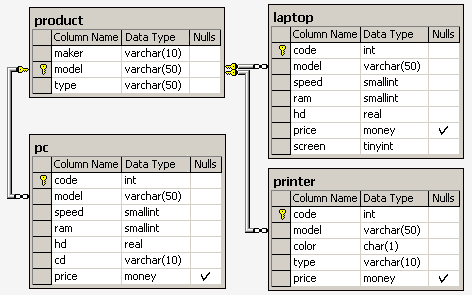

In [ ]:
SELECT model, 
       speed, 
       hd
  FROM PC
 WHERE price < 500

### 2

Найдите производителей принтеров. Вывести: maker

In [ ]:
SELECT DISTINCT maker
  FROM Product
 WHERE type = 'Printer'

### 3

Найдите номер модели, объем памяти и размеры экранов ПК-блокнотов, цена которых превышает 1000 дол.

In [ ]:
SELECT model, 
       ram, 
       screen
  FROM Laptop
 WHERE price > 1000

### 4

Найдите все записи таблицы `Printer` для цветных принтеров.

In [ ]:
SELECT *
  FROM Printer
 WHERE color = 'y'

### 5

Найдите номер модели, скорость и размер жесткого диска ПК, имеющих 12x или 24x CD и цену менее 600 дол.

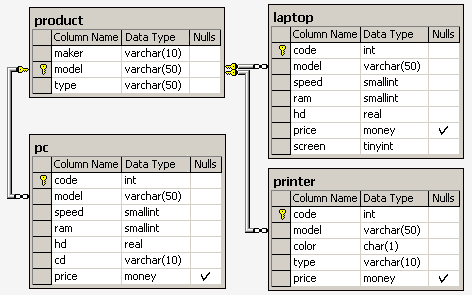

In [ ]:
SELECT model, 
       speed, 
       hd
  FROM PC
 WHERE (cd = '12x' OR cd = '24x') 
       AND price < 600


### 6

Для каждого производителя, выпускающего ПК-блокноты c объёмом жесткого диска не менее 10 Гбайт, найти скорости таких ПК-блокнотов. Вывод: производитель, скорость.


In [ ]:
SELECT DISTINCT Product.maker, Laptop.speed
  FROM Product join Laptop
       ON Product.model = Laptop.model 
 WHERE Laptop.hd >= 10

### 7

Найдите номера моделей и цены всех имеющихся в продаже продуктов (любого типа) производителя B (латинская буква).

In [ ]:
SELECT p.model, 
       price
  FROM (SELECT model, 
               price
          FROM laptop
         UNION
        SELECT model, 
               price
          FROM pc
         UNION
       SELECT model, 
               price
          FROM printer) AS a join product AS p 
       ON a.model = p.model
 WHERE maker = 'B'

### 8

Найдите производителя, выпускающего ПК, но не ПК-блокноты.

In [ ]:
SELECT DISTINCT maker
  FROM product
 WHERE type = 'PC' 
       AND maker NOT IN (SELECT maker
                           FROM product
                          WHERE type = 'Laptop')

### 9

Найдите производителей ПК с процессором не менее 450 Мгц. Вывести: Maker

In [ ]:
SELECT DISTINCT maker
  FROM product p join pc
       ON p.model = pc.model
 WHERE speed >= 450

### 10

Найдите модели принтеров, имеющих самую высокую цену. Вывести: model, price

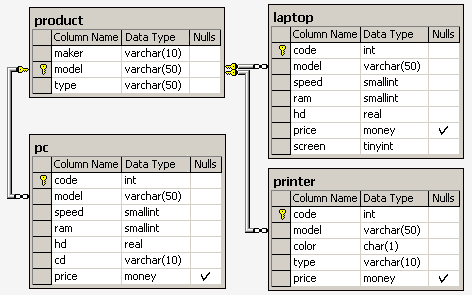

In [ ]:
SELECT model, 
       price
  FROM printer
 WHERE price = (SELECT MAX(price) 
                  FROM printer)

### 11

Найдите среднюю скорость ПК.

In [ ]:
SELECT AVG(speed) AS avg_speed
  FROM pc

### 12

Найдите среднюю скорость ПК-блокнотов, цена которых превышает 1000 дол.

In [ ]:
SELECT AVG(speed) AS avg_speed
  FROM laptop
 WHERE price > 1000

### 13

Найдите среднюю скорость ПК, выпущенных производителем A.

In [ ]:
SELECT AVG(speed) AS avg_speed
  FROM product JOIN pc
       ON product.model = pc.model
 WHERE maker = 'A'

### 14

Найдите класс, имя и страну для кораблей из таблицы Ships, имеющих не менее 10 орудий.

In [ ]:
SELECT ships.class AS class,
       ships.name AS name,
       classes.country AS country
  FROM ships JOIN classes
       ON classes.class = ships.class
 WHERE numGuns >= 10


### 15

Найдите размеры жестких дисков, совпадающих у двух и более PC. Вывести: HD

In [ ]:
SELECT hd
  FROM pc
 GROUP BY hd
HAVING COUNT(*) > 1


### 16

Найдите пары моделей PC, имеющих одинаковые скорость и RAM. В результате каждая пара указывается только один раз, т.е. (i,j), но не (j,i), Порядок вывода: модель с большим номером, модель с меньшим номером, скорость и RAM.

In [ ]:
SELECT DISTINCT p1.model, 
       p2.model, 
       p1.speed, 
       p1.ram
  FROM pc AS p1, pc AS p2
 WHERE p1.model > p2.model 
       AND p1.ram = p2.ram 
       AND p1.speed = p2.speed


### 17

In [ ]:
Найдите модели ПК-блокнотов, скорость которых меньше скорости каждого из ПК.
Вывести: type, model, speed

In [ ]:
SELECR DISTINCT type, 
       laptop.model, 
       laptop.speed
  FROM product JOIN laptop
       ON product.model = laptop.model
 WHERE laptop.speed < (SELECT MIN(speed)
                         FROM pc)


### 18

Найдите производителей самых дешевых цветных принтеров. Вывести: maker, price

In [ ]:
SELECT DISTINCT maker, price 
  FROM product join printer
       ON product.model = printer.model
 WHERE price = (SELECT MIN(price) 
                 FROM printer 
                WHERE color = 'y')
       AND color = 'y'


### 19

Для каждого производителя, имеющего модели в таблице Laptop, найдите средний размер экрана выпускаемых им ПК-блокнотов.
Вывести: maker, средний размер экрана.

In [ ]:
SELECT maker, 
       AVG(screen) AS avg_screen
  FROM laptop JOIN product
       ON laptop.model = product.model
 GROUP BY maker


### 20

Найдите производителей, выпускающих по меньшей мере три различных модели ПК. Вывести: Maker, число моделей ПК.

In [ ]:
SELECT maker, 
       COUNT(model) AS num_models
  FROM product
 WHERE type = 'PC'
 GROUP BY maker
HAVING COUNT(model) >= 3


### 21

Найдите максимальную цену ПК, выпускаемых каждым производителем, у которого есть модели в таблице PC.
Вывести: maker, максимальная цена.

In [ ]:
SELECT maker, 
       MAX(price) AS max_price
  FROM product JOIN pc
       ON product.model = pc.model
 WHERE type = 'PC'
 GROUP BY maker


### 22

In [ ]:
SELECT speed, 
       AVG(price) AS avg_price
  FROM PC
 WHERE speed > 600
 GROUP BY speed


### 23

Найдите производителей, которые производили бы как ПК
со скоростью не менее 750 МГц, так и ПК-блокноты со скоростью не менее 750 МГц.
Вывести: Maker

In [ ]:
SELECT DISTINCT maker
  FROM product JOIN pc 
       ON product.model = pc.model
 WHERE speed >= 750 
       AND maker IN (SELECT maker
                       FROM product JOIN laptop 
                            ON product.model=laptop.model
                      WHERE speed >= 750)



### 24

Перечислите номера моделей любых типов, имеющих самую высокую цену по всей имеющейся в базе данных продукции.

In [ ]:
SELECT model
  FROM (SELECT model, 
               price
          FROM pc
         UNION
        SELECT model, 
               price
          FROM laptop
         UNION 
        SELECT model, 
               price
          FROM printer) AS q1
 WHERE price = (SELECT MAX(price)
                  FROM (SELECT price
                          FROM pc
                         UNION
                        SELECT price
                          FROM laptop
                         UNION 
                        SELECT price
                          FROM printer) AS q2)

### 25

Найдите производителей принтеров, которые производят ПК с наименьшим объемом RAM и с самым быстрым процессором среди всех ПК, имеющих наименьший объем RAM. Вывести: Maker


In [ ]:
SELECT DISTINCT maker
  FROM product
 WHERE model IN (SELECT model
                  FROM pc
                 WHERE ram = (SELECT MIN(ram)
                                FROM pc
                             )
       AND speed = (SELECT MAX(speed)
                      FROM pc
                     WHERE ram = (SELECT MIN(ram)
                                    FROM pc
                                 )
                   )
                )